# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [22]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


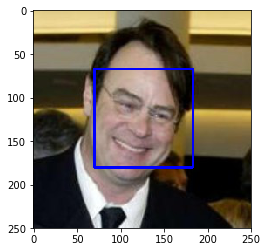

In [23]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [24]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [25]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
import time


#For each file in human file
hum_face_count = 0
start = time.perf_counter()
for (human_file) in human_files_short:
    if (face_detector (human_file)): hum_face_count += 1

stop = time.perf_counter()
        
print (f"Human Files: Found {hum_face_count} files with faces in {stop - start:0.4f} seconds")

#For each file in dog file
hum_face_count = 0
start = time.perf_counter()
for (dog_file) in tqdm(dog_files_short):
    #Start timer
    if (face_detector (dog_file)): hum_face_count += 1

stop = time.perf_counter()

print (f"Dog Files: Found {hum_face_count} files with faces in {stop - start:0.4f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Human Files: Found 98 files with faces in 3.6859 seconds


100%|██████████| 100/100 [00:38<00:00,  2.61it/s]

Dog Files: Found 17 files with faces in 38.3224 seconds


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [26]:
### (Optional) 
### Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

# extract pre-trained face detector
haar2_face_classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')

# returns "True" if face is detected in image stored at img_path
def haar2_face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar2_face_classifier.detectMultiScale(gray)
    return faces

#For each file in human file
hum_face_count = 0
start = time.perf_counter()
for (human_file) in tqdm(human_files_short):
    if (len(haar2_face_detector (human_file)) > 0):
        hum_face_count += 1

stop = time.perf_counter()
        
print (f"Human Files: Found {hum_face_count} files with faces in {stop - start:0.4f} seconds using haarcascade_frontalface2")

#For each file in dog file
hum_face_count = 0
start = time.perf_counter()
for (dog_file) in tqdm(dog_files_short):
    #Start timer
    faces = haar2_face_detector (dog_file)
    if (len(faces) > 0):
        hum_face_count += 1

stop = time.perf_counter()
print (f"Dog Files: Found {hum_face_count} files with faces in {stop - start:0.4f} seconds using haarcascade_frontalface2")


  0%|          | 0/100 [00:00<?, ?it/s]

Human Files: Found 100 files with faces in 3.1797 seconds using haarcascade_frontalface2


100%|██████████| 100/100 [00:37<00:00,  2.69it/s]

Dog Files: Found 21 files with faces in 37.1280 seconds using haarcascade_frontalface2


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [27]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [28]:
from PIL import Image
import torchvision.transforms as transforms
import requests

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## Complete the function.
    ## Load and pre-process an image from the given img_path
    vgg16_model = models.vgg16(pretrained=True)
    
    img = Image.open(img_path)
    
    img_transformer = transforms.Compose([transforms.Resize(256),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    
    image_tensor = img_transformer(img)  
    prediction = vgg16_model(image_tensor[None, ...])

    ## Return the *index* of the predicted class for that image
    prediction = prediction.data.numpy().argmax()

    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [29]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    image_class_index =  VGG16_predict (img_path)
    return image_class_index >= 151 and image_class_index <= 268 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
2% of the images in human_files_short have a detected dog
100% of the images in dog_files_short have a detected dog

In [30]:
### Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dogs_found_in_human_files = 0
for test_file in tqdm(human_files_short):
    if dog_detector(test_file):
        dogs_found_in_human_files += 1
print (f"Found {dogs_found_in_human_files} dogs in the human images")
        
dogs_found_in_dog_files = 0
for test_file2 in tqdm(dog_files_short):
    if dog_detector(test_file2):
        dogs_found_in_dog_files += 1
                
print (f"Found {dogs_found_in_dog_files} dogs in the dog images")

  0%|          | 0/100 [00:00<?, ?it/s]

Found 2 dogs in the human images


100%|██████████| 100/100 [04:21<00:00,  2.58s/it]

Found 100 dogs in the dog images


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
import numpy as np
from glob import glob
from PIL import Image
from torchvision import datasets
import collections
import torchvision.transforms as transforms
import torch

# check if CUDA is available
use_cuda = torch.cuda.is_available()

In [2]:
#Examine the training data and see what sizes are there
training_files = np.array(glob("/data/dog_images/train/*/*"))
imageDims = collections.Counter()
for i in range(len(training_files)):
    img = Image.open(training_files[i])
    imageDims[str(img.size)] += 1

[(i, imageDims[i] / len(training_files) * 100.0) for i,count in imageDims.most_common(10)]

[('(640, 480)', 5.553892215568863),
 ('(500, 375)', 5.269461077844311),
 ('(480, 640)', 3.2335329341317367),
 ('(500, 333)', 2.3203592814371254),
 ('(640, 427)', 1.407185628742515),
 ('(375, 500)', 1.407185628742515),
 ('(427, 640)', 1.0179640718562875),
 ('(800, 600)', 0.9580838323353293),
 ('(333, 500)', 0.8383233532934131),
 ('(400, 300)', 0.7934131736526946)]

In [3]:
import os
from torchvision import datasets

### Data loaders for training, validation, and test sets
## with transforms, and batch_sizes

data_dir = "/data/dog_images"
image_dimensions = 480

train_transforms = transforms.Compose ([transforms.RandomRotation(45),
                                       transforms.RandomResizedCrop(image_dimensions),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

test_transforms = transforms.Compose ([transforms.Resize((image_dimensions,image_dimensions)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

valid_transforms = transforms.Compose ([transforms.Resize((image_dimensions,image_dimensions)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder(data_dir + "/train", transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + "/test", transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + "/valid", transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)

loaders_scratch = {'train':trainloader,
                   'test': testloader,
                   'valid':validloader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: For the training set I've selected a size of 480. This is based on finding the most common size in the training set of which about 8.5% have a dimension of 640 * 480. I didn't want to lose any data unnecessarily (through resizing), so chose the width that appeared most often.

I decided to augment the dataset to get a bit more variety. As the classification task is hard to begin with, augmenting the data set may offer the possibility of finding more accurate patterns. I used random rotation and horizontal and vertical flips to provide that variety.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [4]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #Conv2d params: in_channels, out_channels, kernel_size
        
        # convolutional layer (sees 480x480x3 image tensor. Input depth 3 colours)
        self.conv1_5k = nn.Conv2d(3, 16, 5, padding=2)
        
        # convolutional layer (sees 240x240x16 tensor)
        self.conv2_5k = nn.Conv2d(16, 32, 5, padding=2)
        
        # convolutional layer (sees 120x120x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
                
        # max pooling layer - reduces each dimension by factor of 2
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layer (60 * 60 * 64 -> 2000)
        self.fc1 = nn.Linear(60 * 60 * 64, 500)
        
        # linear layer (2000 -> 500)
        self.fc2 = nn.Linear(500, 250)
        
        # linear layer (500 -> 133)
        self.fc3 = nn.Linear(250, 133)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

     
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        
        # convolutional layer and pool
        # input: 480x480x3 image tensor. Input depth 3 colours
        # output: 240x240x16
        x = self.pool(F.relu(self.conv1_5k(x)))

        # convolutional layer and pool
        # input: 240x240x16 image tensor
        # output: 120x120x32
        x = self.pool(F.relu(self.conv2_5k(x)))

        # convolutional layer and pool 
        # input: 120x120x32 image tensor
        # output: 60x60x64
        x = self.pool(F.relu(self.conv3(x)))   
        
        #Now we've got through the convoluted layers, flatten image input ready for
        #the linear layers. Its a 60 * 60 * 64
        x = x.view(-1, 60 * 60 * 64)
        x = self.dropout(x)
    
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # add final layer
        x = self.fc3(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [5]:
print (model_scratch)

Net(
  (conv1_5k): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2_5k): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=230400, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 


__Round 1:__
Investigating the training data, there are a mixture of resolutions and so, in terms of resizing them, I chose a size of (480x480) which appeared to capture a reasonable number of the images. This is larger than the 224x224 that the vgg16 set was trained on but I wanted to see how it performed.
Although I knew that vgg has 16 layers, I chose to use around 3 convolution layers with kernel size 3 as a starting point to get an idea of what sort of accuracy I could achieve, with 2 fully connected layers at the end resulting in 133 outputs - achieved 2% accuracy

Note: Found an error in my validation loss averaging calculation and fixed that before Round 2

__Round 2:__
Increased to 3 FC layers and changed the last convolution layer to kernel size of 5 to see if I could draw out some more specific patterns with a larger  5x5 kernel in the last layer - 7% accuracy achieved.

__Round 3:__
As the increase in kernel size seemed to be effective, it made sense to increase the kernel size for the earlier convolution layers where the width and height is larger. Increased kernel size to 5 in the first two convolution layers and reduced to 3 in the 3rd convolution layer (where width and height are smaller). Also switched optimizer to Adam (from SGD) as apparently it can learn quicker but perhaps not as accurately. However, it will be sufficient to achieve the goal of 10% accuracy in the model - achieved 1% accuracy. 

Note: Found something wrong with the validation loss calculation as I had changed it to determine during the batch runs rather than adding it all up and then dividing at the end. This turned out to be a bit of a pain as I was getting cuda out of memory errors. This turned out to be because I was using loss rather than loss.detach(). This meant that the loss was not getting freed and therefore stacking up in memory. Fixed before round 4

__Round 4:__
Restarted the kernel. Same settings as round 3 but switched to SGD optimiser. Model was continually getting better. After 40 epochs, achieved accuracy of 10% after 140 epochs

__Lessons learnt:__
I could probably have achieved the accuracy with the first model I produced, but errors in my training and validation loss calculations were causing the model to not train properly. However, it took approx 140 epochs and a lot of GPU time. If I were to start again I would try a further convolution layer (4 in total) to provide greater depth and see if that would train quicker

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
import torch.optim as optim

### select loss function
criterion_scratch = nn.CrossEntropyLoss()

### select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [7]:
import sys
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
       

        ###################
        # train the model #
        ###################
        model.train()
        try:
            for batch_idx, (data, target) in enumerate(loaders['train']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## find the loss and update the model parameters accordingly
                ## record the average training loss, using something like
                ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

                # clear the gradients of all optimized variables
                optimizer.zero_grad()
                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # backward pass: compute gradient of the loss with respect to model parameters
                loss.backward()
                # perform a single optimization step (parameter update)
                optimizer.step()
                # update average validation loss 
                train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.detach() - train_loss))
                     
        except:
            print(f"Exception occurred: {sys.exc_info()[0]}. Raising...")
            raise
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        try:
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()

                # forward pass: compute predicted outputs by passing inputs to the model
                output = model(data)
                # calculate the batch loss
                loss = criterion(output, target)
                # update average validation loss 
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.detach() - valid_loss))

        except:
            print(f"Exception occurred: {sys.exc_info()[0]}. Raising...")
            raise


        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
        ))
        
        ## Save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            
    
    # return trained model
    return model


In [10]:
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.841071 	Validation Loss: 4.093557
Validation loss decreased (inf --> 4.093557).  Saving model ...
Epoch: 2 	Training Loss: 3.831465 	Validation Loss: 4.101634
Epoch: 3 	Training Loss: 3.821162 	Validation Loss: 4.103354
Epoch: 4 	Training Loss: 3.800712 	Validation Loss: 4.185498
Epoch: 5 	Training Loss: 3.819454 	Validation Loss: 3.990183
Validation loss decreased (4.093557 --> 3.990183).  Saving model ...
Epoch: 6 	Training Loss: 3.812642 	Validation Loss: 4.082256
Epoch: 7 	Training Loss: 3.788965 	Validation Loss: 4.063501
Epoch: 8 	Training Loss: 3.788430 	Validation Loss: 4.043944
Epoch: 9 	Training Loss: 3.778600 	Validation Loss: 4.224717
Epoch: 10 	Training Loss: 3.788074 	Validation Loss: 4.103302
Epoch: 11 	Training Loss: 3.779515 	Validation Loss: 3.983495
Validation loss decreased (3.990183 --> 3.983495).  Saving model ...
Epoch: 12 	Training Loss: 3.778976 	Validation Loss: 4.225480
Epoch: 13 	Training Loss: 3.771715 	Validation Loss: 3.995769
E

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [11]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [13]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.933965


Test Accuracy: 10% (88/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [14]:
## Specify data loaders that have the right size
data_dir = "/data/dog_images"

image_dimensions = 224

train_transforms = transforms.Compose ([transforms.RandomRotation(45),
                                       transforms.RandomResizedCrop(image_dimensions),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomVerticalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

test_transforms = transforms.Compose ([transforms.Resize((image_dimensions,image_dimensions)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_data = datasets.ImageFolder(data_dir + "/train", transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + "/test", transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir + "/valid", transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)

loaders_transfer = {'train':trainloader,
                   'test': testloader,
                   'valid':validloader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
import torchvision.models as models
import torch.nn as nn

## Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

#Freeze training for all features layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

#Create the final classification layer and set it in the model
n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, 133)
model_transfer.classifier[6] = last_layer

print (f"Model has {model_transfer.classifier[6].out_features} output features")
print (model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:31<00:00, 17415035.94it/s]


Model has 133 output features
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I took the vgg16 model and replaced the last linear layer with a layer of my own that had the 133 outputs to enable me top classify the dogs correctly. The convolutional layers in the Vgg16 should draw out enough features to enable me to classify the 133 classes of dog.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [16]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [ ]:
# train the model - only do 20 epochs and then see what its like (can carry on
# training it if we haven't achieved enough accuracy)
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')


In [17]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.749110


Test Accuracy: 78% (654/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [19]:
### Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
               
    img = Image.open(img_path)
    
    img_transformer = transforms.Compose([transforms.Resize(256),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    
    image_tensor = img_transformer(img)  
    
    if use_cuda:
        image_tensor = image_tensor.cuda()
    
    prediction = model_transfer(image_tensor[None, ...])

    ## Return the *index* of the predicted class for that image - don't
    ## need to do softmax, just want the biggest number
    prediction = torch.argmax(prediction)
    
    return class_names[prediction] # predicted dog type

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [20]:
### Write your algorithm.
### Feel free to use as many code cells as needed.
def display_img(imgpath):
    img = cv2.imread(imgpath)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    dog_type = predict_breed_transfer(img_path)
    if (dog_detector (img_path)):
        print (f"Found a dog. Probably a {dog_type}")
    else:
        faces = face_detector(img_path)
        if faces > 0:
            print (f"Found {faces:d} human(s). One of them looks similar to a {dog_type}")
        else:
            print (f"No humans or dogs here")   
    display_img(img_path)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Quite surprised by the output, works better than I expected and detected what type of dog I had. 
Possible Improvements:
1. Detector could be improved to detect multiple dogs
2. Add performance monitoring to see where performance can be improved. Each image is getting run through the VGG16 model multiple times (once to predict the breed, once to determine if there is a dog, once to detect if it is a human) and would be nice to run through the convolutional layers once and then use those outputs to run through a different fully connected layers to determine dog breed and whether it is a human. 
3. UI: Display a picture of the relevant breed next to the person

Found 1 human(s). One of them looks similar to a Beagle


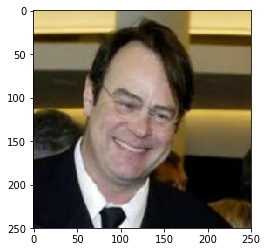

Found 1 human(s). One of them looks similar to a Chesapeake bay retriever


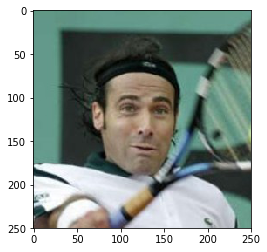

Found a dog. Probably a Otterhound


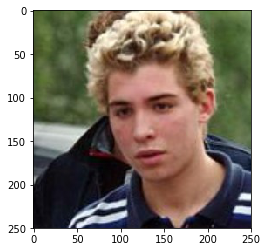

Found a dog. Probably a Bullmastiff


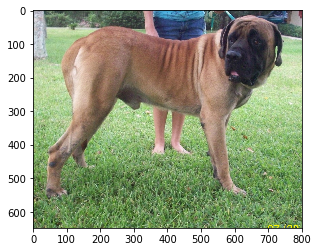

Found a dog. Probably a Mastiff


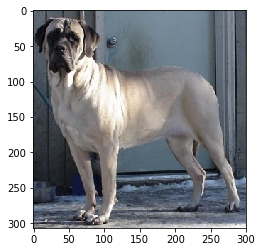

Found a dog. Probably a Mastiff


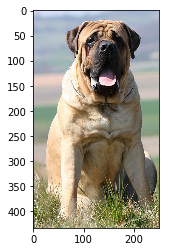

In [31]:
## Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [32]:
my_files = np.array(glob("*.jpg"))


Found 1 human(s). One of them looks similar to a Tibetan mastiff


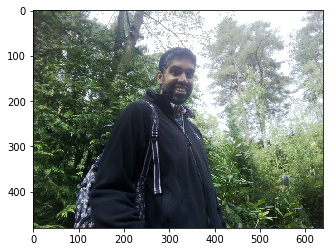

Found 1 human(s). One of them looks similar to a Golden retriever


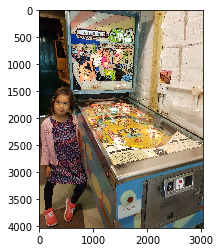

Found 1 human(s). One of them looks similar to a Golden retriever


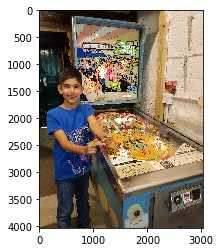

Found a dog. Probably a Border collie


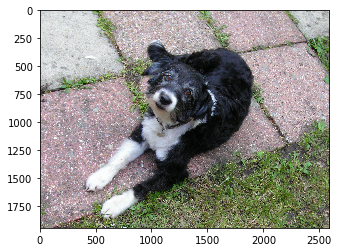

No humans or dogs here


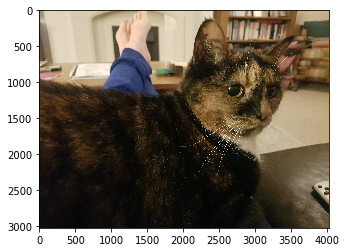

In [33]:
for file in np.hstack((my_files)):
    run_app(file)